<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
real = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

In [5]:
real.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [7]:
real.isnull().sum() #no null values in the dataset

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
real.info() #datatype are : objects, ints and floats, 985 datapoints, 12 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
real.dtypes #confirmed datatype

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [10]:
real.shape #confirmed shape

(985, 12)

In [11]:
real.columns # the columns are all named with lowercase

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [13]:
real['sale_date'].dtypes #datetime is a type 'O' object, if needed I will convert it later

dtype('O')

In [14]:
real['type'].value_counts() # There is 1 'unknown' type of real estate, check the row.

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

In [15]:
real[real['type'] == 'Unkown'] #0 baths, 0beds, 0 sq foot, perhaps the data entry was not complete. Delete later.

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [16]:
real['state'].unique() #CA is for California, AC is not a state, which is probably a typo

array(['CA', 'AC'], dtype=object)

In [17]:
real[real['state'] == 'AC'] #checking the state = 'AC', why is the price a negative value and the sq ft negative?

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [18]:
real.loc[703,'price'] = abs(real.loc[703,'price']) #make the negative price positive by the abs() method

In [19]:
real.loc[703,'price'] #price is now positive for row 703

210944

In [20]:
real.loc[703,'sq__ft'] = abs(real.loc[703,'sq__ft']) #make the sq ft positive by the abs() method

In [21]:
real.loc[703,'sq__ft'] #sq ft is now positive for row 703

984

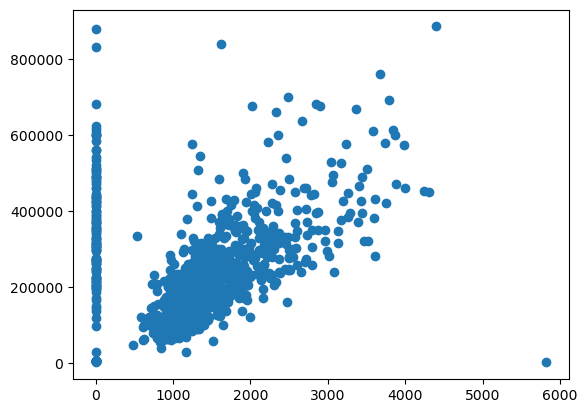

In [22]:
plt.scatter(x=real['sq__ft'], y=real['price']); #plotting price v.s. sq_ft, why are there 0 square foot listings???

In [23]:
real['sq__ft'].value_counts() #there are 171 'zero' square feet listings

sq__ft
0       171
1120      8
795       6
1039      5
1080      5
       ... 
1366      1
804       1
1995      1
779       1
1319      1
Name: count, Length: 603, dtype: int64

In [24]:
#171/985 = 17% of the data will be gone. Thus i will check these houses with the 0 sq ft. 

In [25]:
real[real['sq__ft'] == 0].head(20) 
# perhaps the null values for sq ft were replaced by zeros, not a typo. 
# if we impute from the sq ft of beds and baths, it is still not possible because some also have 0 beds, 0 baths and 0 sq ft.

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378


In [26]:
 # I decided to drop the square feet houses that have 0 sq.ft, although it is 17% of the data, (985-171=814) the data points are still 814, which is a high number of houses to apply analysis.
real = real[(real.sq__ft > 0)] # I dropped 0 sqm2 houses, which includes dropping the 'Unknown' real estate type as well. 

In [27]:
real[real['sq__ft'] == 0].head() #check if I dropped successfully

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [28]:
# Check if there are no 'zero' prices.

In [29]:
real[real['price'] == 0] #there are no '0' prices.

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


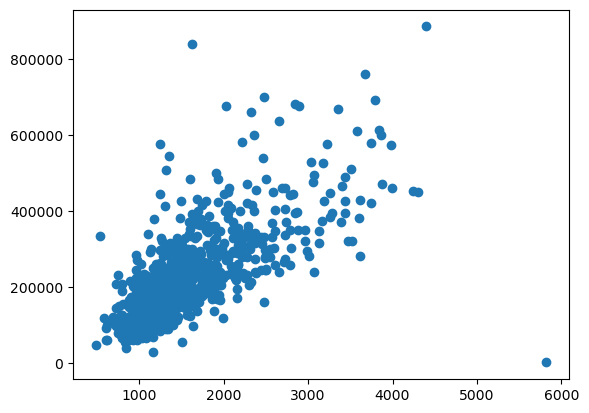

In [30]:
plt.scatter(x=real['sq__ft'], y=real['price']); #check with the scatter plot price v.s. sq_ft again

In [31]:
#we also have an outlier near 6000 which is super cheap. In total I observed about 4 outliers in the scatter plot above. 
#Most data is in the lower range of prices. The higher the price, the more variation.

In [32]:
real['price'].describe() #mean price $229,000 , std is wide $120,000, wide price range from $2000 - $885,000, median $208,000

count       814.000000
mean     229448.369779
std      119825.576060
min        2000.000000
25%      148750.000000
50%      207986.500000
75%      284973.250000
max      884790.000000
Name: price, dtype: float64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

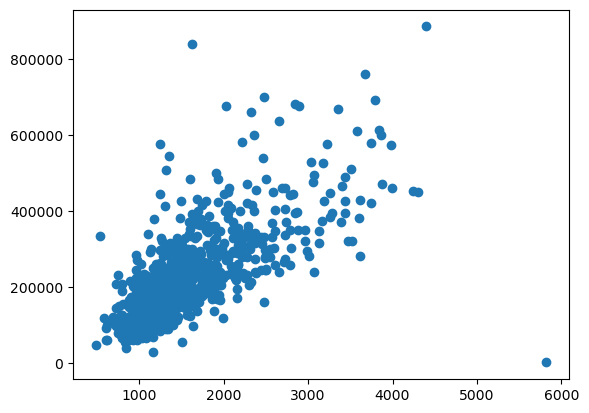

In [34]:
# y=price
# X= baths, beds, types, sq_ft , zip, sale_date? as potential candidates to predict price

#I would like to use square feet to predict because it is an integer, 
# no. of beds and baths could also be reflected by the sq feet.

plt.scatter(x=real['sq__ft'], y=real['price']);

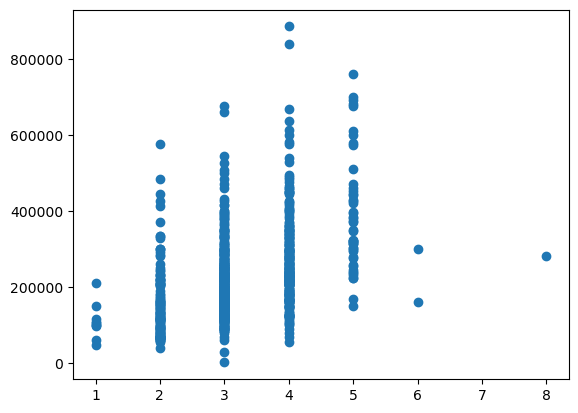

In [35]:
plt.scatter(x=real['beds'], y=real['price']);

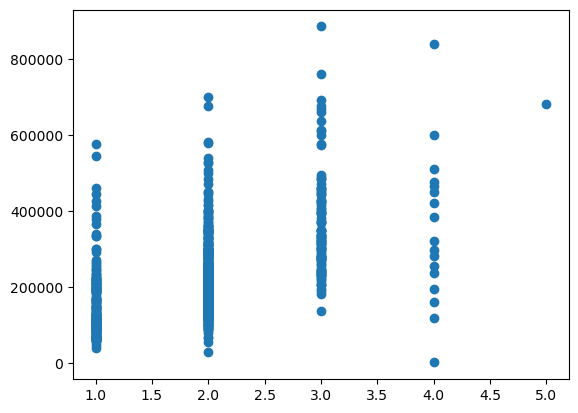

In [36]:
plt.scatter(x=real['baths'], y=real['price']); #zero baths is possible

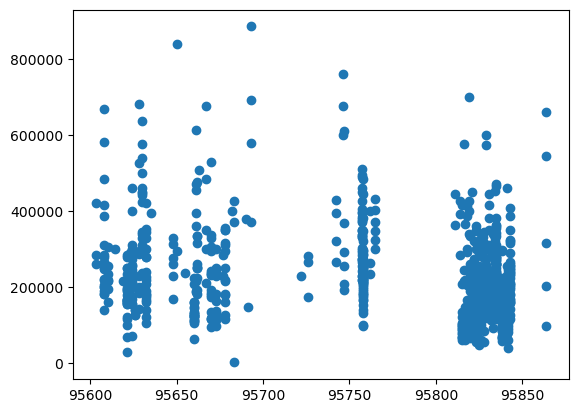

In [37]:
plt.scatter(x=real['zip'], y=real['price']); # there are  zipcodes in the dataset, which is not as indicative of price as within each zipcode, there are a range of prices.
#thus, I do not want zip to be in the analysis.

In [38]:
real['sale_date'].value_counts() #we only have 5 dates? Thus, I think that there is no major meaningful relationship potential with the y target value as there are only 5 dates on the dataset.
#thus the date is perhaps not the best predictor of the price

sale_date
Fri May 16 00:00:00 EDT 2008    216
Mon May 19 00:00:00 EDT 2008    197
Wed May 21 00:00:00 EDT 2008    146
Tue May 20 00:00:00 EDT 2008    146
Thu May 15 00:00:00 EDT 2008    109
Name: count, dtype: int64

<Axes: >

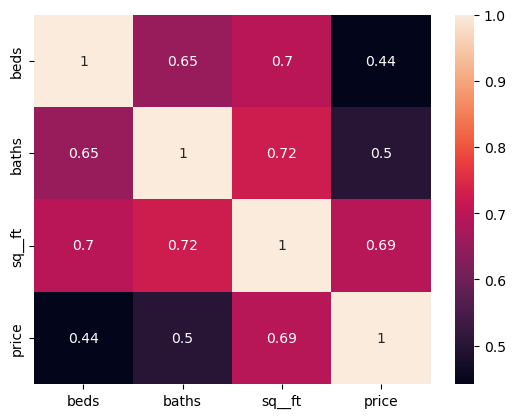

In [39]:
# I only need int datatypes for the correlation plot 
int_columns = ['beds', 'baths', 'sq__ft', 'price']

# Plotting the correlation heatmap, the best ones are sq_ft, beds, baths, and price.
sns.heatmap(real[int_columns].corr(), annot=True)

In [40]:
# Dropping columns
# I would like to drop the object columns, since machine learning does not work with strings or text datatypes 
# I want to exclude zipcode, latitude, and longitude as they are not actual integers for meaningful numerical analysis.
# city, state, and street are also not part of the numerical analysis, thus they will be dropped.
# the 'type' column will be used later in the lab so it is not dropped. 

In [41]:
real.drop(columns=['sale_date', 'zip', 'latitude', 'longitude', 'city', 'state', 'street'], inplace=True)

In [42]:
real.columns #check

Index(['beds', 'baths', 'sq__ft', 'type', 'price'], dtype='object')

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

In [44]:
# I would like to use 'price' as the predictor of the y dependent variable as it can be measured as an outcome target, 
#and it has the potential to be predicted.

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [46]:
def get_intercept_and_slope(x, y): 
    x_mean = x.mean()
    y_mean = y.mean()
    x_std = x.std()
    y_std = y.std()
    correlation = real[['sq__ft', 'price']].corr().iloc[0,1]
    B_one = correlation*(y_std/x_std)
    B_zero = y_mean - (B_one*x_mean)
    return B_zero, B_one

In [47]:
B_zero, B_one = get_intercept_and_slope(x=real['sq__ft'], y=real['price']) 

In [48]:
print(f"The slope is {B_one}, and the intercept is {B_zero}.")

The slope is 125.21648667984455, and the intercept is 30210.63386691903.


### 6. Now interpret the intercept and the slope.

In [50]:
#The intercept is the expected value of the y output (price) when x=0.
#the slope is the change or average increase in y variable (price) if one unit of X increases (sq_ft). 
#Thus for 1 increase in sq_ft, the price increases by approx. $125, with some associated error.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [52]:
# used for the line of best fit to predict prices in association with the x variable i.e. the square footage. 
#inference: we can use the null hypothesis to reject our null hypothesis with the p-value.

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

In [54]:
X = real[['sq__ft']]
y= real['price']

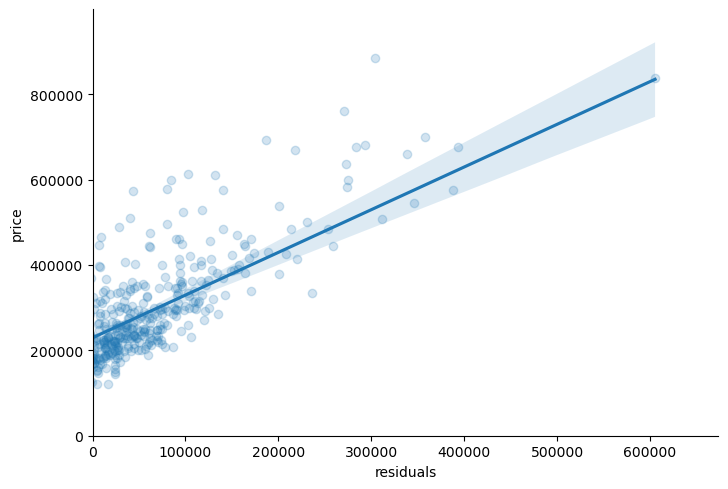

In [55]:
x = X.values  # .values changes the output from the X DataFrame to a np.ndarray

# regression calculation
y_preds = B_zero + B_one * x

# assign predictions back to the original DataFrame
real['predictions'] = y_preds

# calculate residuals
real['residuals'] = real['price'] - real['predictions']

# plot residuals using Seaborn's lmplot
sns.lmplot(x='residuals', y='price', data=real, aspect=1.5, scatter_kws={'alpha':0.2}) 

# Set x and y limits #advice from Torn 
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

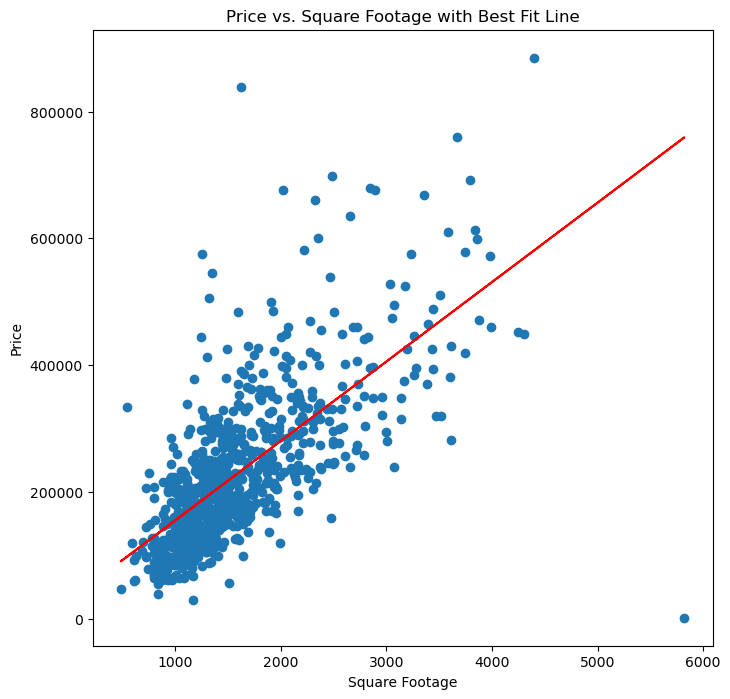

In [56]:
# Plotting line of best fit
x = real['sq__ft']
y = real['price']
get_intercept_and_slope(x, y)
plt.figure(figsize=(8,8))
plt.scatter(x, y);
plt.plot(x, B_zero + B_one*x, c='r');
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Price vs. Square Footage with Best Fit Line');

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [59]:
real['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [60]:
real_dummies = pd.get_dummies(real, columns=['type'], dtype=int)

In [61]:
real_dummies.head() #'condo' and 'multifamily' type both '0', so one can be dropped.

,beds,baths,sq__ft,price,predictions,residuals,type_Condo,type_Multi-Family,type_Residential
0,2,1,836,59222,134891.616731,-75669.616731,0,0,1
1,3,1,1167,68212,176338.273822,-108126.273822,0,0,1
2,2,1,796,68880,129882.957264,-61002.957264,0,0,1
3,2,1,852,69307,136895.080518,-67588.080518,0,0,1
4,2,1,797,81900,130008.173751,-48108.173751,0,0,1


### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [63]:
# I will drop the 'Condo' column as it is also 0 which is the same as multi-family
real_dummies.drop('type_Condo', axis=1, inplace=True)

In [64]:
real_dummies #check

,beds,baths,sq__ft,price,predictions,residuals,type_Multi-Family,type_Residential
0,2,1,836,59222,134891.616731,-75669.616731,0,1
1,3,1,1167,68212,176338.273822,-108126.273822,0,1
2,2,1,796,68880,129882.957264,-61002.957264,0,1
3,2,1,852,69307,136895.080518,-67588.080518,0,1
4,2,1,797,81900,130008.173751,-48108.173751,0,1
...,...,...,...,...,...,...,...,...
980,4,3,2280,232425,315704.223497,-83279.223497,0,1
981,3,2,1477,234000,215155.384693,18844.615307,0,1
982,3,2,1216,235000,182473.881670,52526.118330,0,1
983,4,2,1685,235301,241200.413922,-5899.413922,0,1


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [66]:
# Check for nulls
real_dummies.isnull().sum()

beds                 0
baths                0
sq__ft               0
price                0
predictions          0
residuals            0
type_Multi-Family    0
type_Residential     0
dtype: int64

In [67]:
# Check datatypes for any corrupted columns
real_dummies.dtypes

beds                   int64
baths                  int64
sq__ft                 int64
price                  int64
predictions          float64
residuals            float64
type_Multi-Family      int32
type_Residential       int32
dtype: object

In [68]:
y = real_dummies['price'] #vector
X = real_dummies[['beds','baths','sq__ft','type_Multi-Family','type_Residential']] #matrix/df

In [69]:
print(X.shape)
print(y.shape)

(814, 5)
(814,)


In [70]:
# Instantiate
model = LinearRegression()
#fit
model.fit(X,y)

LinearRegression()

In [71]:
# coefficients
model.coef_

array([-14447.57576263,   8104.1001454 ,    130.83028256, -26178.25907335,
        32437.02588848])

In [72]:
# y intercept
model.intercept_

22436.14904458067

In [73]:
predictions = model.predict(X)

In [74]:
# calculate residuals 
residuals = y - predictions

### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

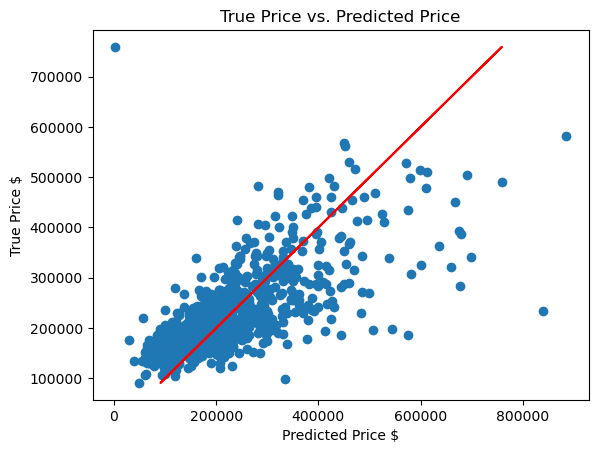

In [76]:
plt.scatter(real_dummies['price'], real_dummies['predictions'])
plt.plot(real_dummies['predictions'], real_dummies['predictions'], color='r');
plt.xlabel('Predicted Price $')
plt.ylabel('True Price $')
plt.title('True Price vs. Predicted Price')
plt.show(); #approx. half the predictions are not as accurate as the true price, shown as the points below the red line.
#if the predictions were accurate, it would be a perfect slope with the true price.

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [78]:
# Ans: LINE assumptions
#SLR:
#L = linearity, there should be a linear relationship between the independent variables (X) and the dependent variable (y)
# I - independent variables: each data point is independent of the others
#N - Normality (of residuals) - the residuals (differences between the observed and the predicted values) should be normally distributed
#E - equal variance of residuals- variance of residuals should be constant (homoscedasticity)
#MLR only:
# the variables are independent

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

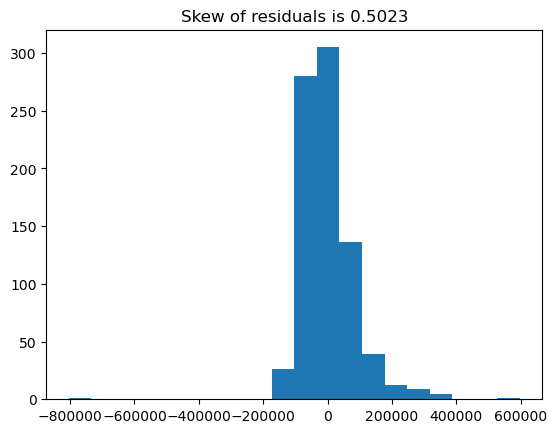

In [142]:
# To check Normality assumption (N)
plt.hist(residuals, bins=20)
plt.title(f"Skew of residuals is {pd.Series(residuals).skew():.4f}")
plt.show() #the skew is positive and distribution appears normal for the residuals

In [144]:
real_dummies['price'].describe()

count       814.000000
mean     229448.369779
std      119825.576060
min        2000.000000
25%      148750.000000
50%      207986.500000
75%      284973.250000
max      884790.000000
Name: price, dtype: float64

In [146]:
real_dummies['price'].sort_values(ascending=False)

864    884790
334    839000
553    760000
333    699000
552    691659
        ...  
605     55422
336     48000
335     40000
603     30000
866      2000
Name: price, Length: 814, dtype: int64

In [174]:
residuals.sort_values(ascending=False)

334    597032.348666
551    384378.029890
853    377118.362688
333    375174.081722
851    349006.231325
           ...      
603   -150286.757395
867   -154156.459397
120   -155050.970165
457   -169381.545696
866   -803640.753262
Name: price, Length: 814, dtype: float64

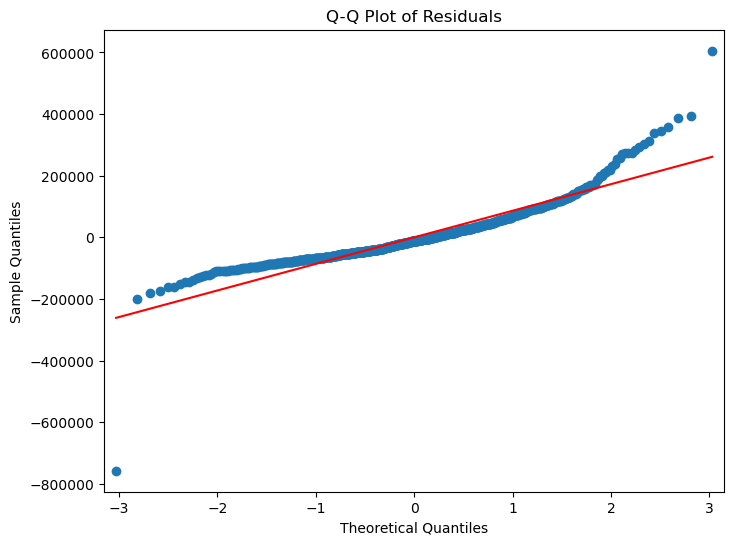

In [154]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(8, 6))

qqplot(real_dummies['residuals'], line='s', ax=ax)

ax.set_title("Q-Q Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

#From the Q-Q plot, the line is roughly straight, suggesting that the residuals are normal. 

In [156]:
from scipy import stats

statistic, p_value = stats.shapiro(real_dummies['residuals'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value}")

# The null hypothesis (H0) of the Shapiro-Wilk test is that the data is normally distributed.

alpha = 0.05  # significance level or alpha

# If the p-value is greater than the chosen alpha level (typically 0.05), 
# we fail to reject the null hypothesis and conclude that the data appears to be normally distributed.
if p_value > alpha:
    print("The residuals appear to be normally distributed (fail to reject H0)")
# If the p-value is less than the alpha level, we reject the null hypothesis and conclude 
# that the data does not appear to be normally distributed.
else:
    print("The residuals do not appear to be normally distributed (reject H0)")

#however, from the Shapiro-Wilk test, the residuals appear not to be normal. 

Shapiro-Wilk test statistic: 0.8646572407890643
p-value: 6.664870698824762e-26
The residuals do not appear to be normally distributed (reject H0)


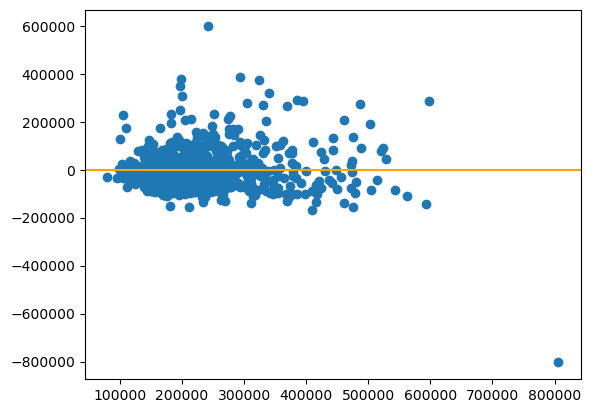

In [139]:
#To check linearity (L) and equal variance (E) assumptions, scatter plot #x=predictions, y=residuals

plt.scatter(predictions, residuals) 
plt.axhline(0, color='orange')
plt.show()

#it appears the predictions have the potential for normality some equally distributed above and below the line.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [150]:
import statsmodels.api as sm

# add intercept = 1, X and y for modeling
real_dummies['intercept'] = 1
X = real_dummies[['intercept','sq__ft','beds','baths','type_Multi-Family','type_Residential']]
y = real_dummies['price']

model = sm.OLS(y,X).fit()
model.summary() 
#from the coefficients in model.summary() below, 
#the coefficients for baths and sq__ft are potential candidates that seem to fit the model since they are positive and large.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          4.44e-116
Time:                        14:04:12   Log-Likelihood:                -10398.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     808   BIC:                         2.084e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept          2.244e+04   1.55e+04      1.448      0.148   -7971.936    5.28e+04
sq__ft              130.8303      7.331     17.847      0.000     116.441     145.220
beds              -1.445e+04   5454.607     -2.649      0.008   -2.52e+04   -3740.704
baths              8104.1001   6949.164      1.166      0.244   -5536.444    2.17e+04
type_Multi-Family -2.618e+04   2.93e+04     -0.894      0.372   -8.36e+04    3.13e+04
type_Residential   3.244e+04   1.46e+04      2.215      0.027    3686.742    6.12e+04
==============================================================================
Omnibus:                      215.963   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6832.550
Skew:                           0.501   Prob(JB):                         0.00
Kurtosis:                      17.158   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [158]:
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator    

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [170]:
# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def king_of_metrics(y_true, y_pred, p): #p = number of features = sq_ft, beds, baths, type_multi-family, type_residential  = 5
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = metrics.root_mean_squared_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print(f"The mean squared error is {mse}")
    print(f"The root mean squared error is {rmse}")
    print(f"The mean squared log error is {msle}")
    print(f"The median absolute error is {mae}")
    print(f"The R^2 is {r2}")
    print(f"Adjusted R^2 = {r2a}")

king_of_metrics(real_dummies['price'], real_dummies['predictions'], 5)

The mean squared error is 7439426337.103196
The root mean squared error is 86252.10917480914
The mean squared log error is 0.16832350796832646
The median absolute error is 47675.54542822165
The R^2 is 0.4812307133326901
Adjusted R^2 = 0.4780205073508379


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [172]:
#if I removed all columns except sq__Ft?
king_of_metrics(real_dummies['price'], real_dummies['predictions'], 1)

The mean squared error is 7439426337.103196
The root mean squared error is 86252.10917480914
The mean squared log error is 0.16832350796832646
The median absolute error is 47675.54542822165
The R^2 is 0.4812307133326901
Adjusted R^2 = 0.4805918349008338


In [ ]:
#The adjusted R^2 did not change much.

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

In [ ]:
#If the features are added, the adj R2 should increase if more complexity is needed, but the value did not change much. 
#My 5-featured model has some degree of bias, for example, near the larger sq__ft values, the model tends to overfit.